In [1]:
import pandas as pd

#### Import CSV

In [2]:
df = pd.read_csv('data/training.csv', index_col=0)
#df['team_strength'] = df['team_points'] * (df['strength']/100)

#### Get X & Y

In [3]:

X = df.drop(columns=['rider', 'team', 'key', 'target', 'year'])
X.fillna(0, inplace=True)
y = df.target

In [4]:
X.head()

,age,team_points,best-classic-riders,top-gc-riders,top-sprinters,top-time-trial-riders,profile_type,profile_score,profile_vert,scorito,strength,finished
666,38,1486,14.0,0.0,0.0,0.0,2.952381,138.190476,2478.047619,66.0,36.0,0.916667
530,37,1459,0.0,0.0,0.0,0.0,3.142857,135.476190,2437.476190,66.0,28.0,0.909091
213,39,2364,83.0,0.0,0.0,54.0,2.952381,134.285714,2570.619048,0.0,53.0,0.818182
285,39,1765,10.0,0.0,0.0,0.0,2.952381,134.285714,2570.619048,0.0,33.0,0.818182
291,36,1603,0.0,0.0,38.0,0.0,2.952381,134.285714,2570.619048,66.0,32.0,0.818182


In [5]:
X.isnull().sum()

age                      0
team_points              0
best-classic-riders      0
top-gc-riders            0
top-sprinters            0
top-time-trial-riders    0
profile_type             0
profile_score            0
profile_vert             0
scorito                  0
strength                 0
finished                 0
dtype: int64

In [6]:
X_year = df.drop(columns=['rider', 'team', 'key', 'target']).fillna(0)
X_train = X_year[X_year['year']!=2021].drop(columns='year')
X_test = X_year[X_year['year']==2021].drop(columns='year')
y_year = df[['year', 'target']]
y_train = y_year[y_year['year']!=2021].drop(columns='year')
y_test = y_year[y_year['year']==2021].drop(columns='year')

#### Check na

In [7]:
corr = X.corr()
corr

,age,team_points,best-classic-riders,top-gc-riders,top-sprinters,top-time-trial-riders,profile_type,profile_score,profile_vert,scorito,strength,finished
age,1.000000,0.040574,0.072090,-0.034940,-0.079501,-0.002566,-0.040316,0.085066,0.011335,0.001007,0.006071,0.631276
team_points,0.040574,1.000000,0.151833,0.221839,0.057008,0.068614,0.340108,-0.462032,-0.147412,0.124635,-0.080637,0.055173
best-classic-riders,0.072090,0.151833,1.000000,0.198326,0.609911,-0.028056,0.036229,-0.059669,0.016565,0.182265,0.007661,0.078680
top-gc-riders,-0.034940,0.221839,0.198326,1.000000,-0.046630,0.290569,0.029261,-0.027056,0.035174,0.315724,-0.031648,0.042491
top-sprinters,-0.079501,0.057008,0.609911,-0.046630,1.000000,-0.074447,0.007433,-0.058360,-0.008576,0.156655,-0.006828,-0.079514
top-time-trial-riders,-0.002566,0.068614,-0.028056,0.290569,-0.074447,1.000000,-0.013543,0.003559,0.081886,0.210517,-0.005966,-0.061217
profile_type,-0.040316,0.340108,0.036229,0.029261,0.007433,-0.013543,1.000000,-0.744882,0.121583,-0.007050,0.228467,0.065113
profile_score,0.085066,-0.462032,-0.059669,-0.027056,-0.058360,0.003559,-0.744882,1.000000,-0.135332,-0.022542,0.142283,0.070343
profile_vert,0.011335,-0.147412,0.016565,0.035174,-0.008576,0.081886,0.121583,-0.135332,1.000000,-0.013778,0.265170,0.156984
scorito,0.001007,0.124635,0.182265,0.315724,0.156655,0.210517,-0.007050,-0.022542,-0.013778,1.000000,-0.047981,0.118541


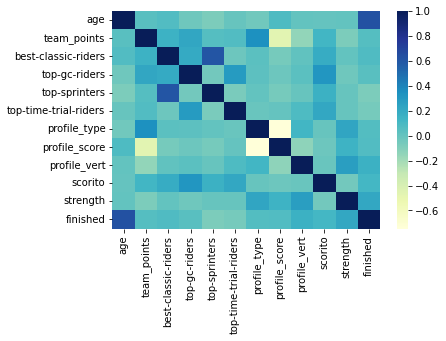

In [8]:
import seaborn as sns
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu");

<AxesSubplot:>

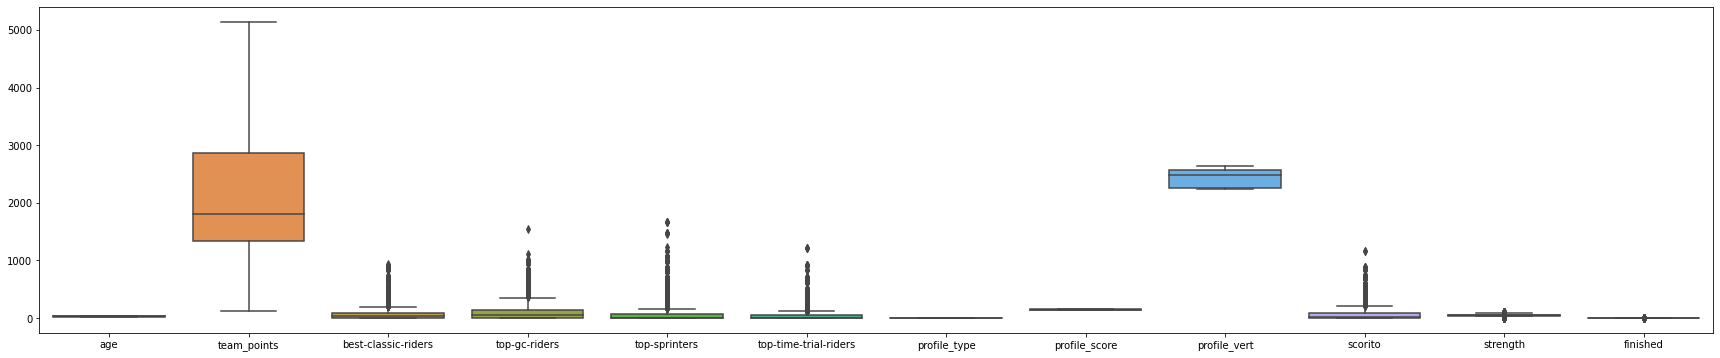

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(30,6))
sns.boxplot(data=X)

In [18]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_train_scaled = scaler.fit_transform(X_train)

In [19]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


for model in [ Ridge(), LinearRegression(), Lasso(alpha=0.1), KNeighborsRegressor(), SVC(), XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1), GradientBoostingRegressor(), AdaBoostRegressor(DecisionTreeRegressor(max_depth=3),
    n_estimators=100)]:
    m = model
    cv_results = cross_validate(m, X_scaled, y, cv=5, scoring='neg_root_mean_squared_error')
    print(f"{str(model)} - {cv_results['test_score'].mean()}")

Ridge() - -127.24413304371865
LinearRegression() - -127.42036796652678
Lasso(alpha=0.1) - -127.3965312517868
KNeighborsRegressor() - -138.44390755037665


/Users/michieldekoninck/.pyenv/versions/3.8.12/envs/boonen/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


SVC() - -182.5609656333159
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...) - -163.14685857428745
GradientBoostingRegressor() - -139.12999113525726
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  n_estimators=100) - -143.96528965752105


In [147]:
y_train['target']

666     42.0
530     42.0
213     42.0
285      0.0
291     42.0
       ...  
895     22.0
896      0.0
912     71.0
916    104.0
920     28.0
Name: target, Length: 1873, dtype: float64

In [25]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
# Instanciate model
model = SVR()

# Hyperparameter search space
search_space = {
    #'alpha': stats.uniform(0.01, 1000)
    'kernel': ['rbf'],
    'C': stats.uniform(20, 40),
    'degree': stats.randint(1,10),
    'epsilon': stats.uniform(50, 65)
}

# Instanciate Random Search
search = RandomizedSearchCV(
    model, search_space,
    n_jobs=-1, scoring='r2', cv=5, n_iter=250, verbose=2,random_state = 0)

# fit it
search = search.fit(X_train_scaled, y_train['target'])


# show best model
best_svc = search.best_estimator_

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
[CV] END C=41.95254015709299, degree=6, epsilon=104.87727365776612, kernel=rbf; total time=   0.1s
[CV] END C=41.95254015709299, degree=6, epsilon=104.87727365776612, kernel=rbf; total time=   0.1s
[CV] END C=41.95254015709299, degree=6, epsilon=104.87727365776612, kernel=rbf; total time=   0.1s
[CV] END C=45.835764522666246, degree=5, epsilon=69.33974942539069, kernel=rbf; total time=   0.1s
[CV] END C=45.835764522666246, degree=5, epsilon=69.33974942539069, kernel=rbf; total time=   0.1s
[CV] END C=45.835764522666246, degree=5, epsilon=69.33974942539069, kernel=rbf; total time=   0.1s
[CV] END C=45.835764522666246, degree=5, epsilon=69.33974942539069, kernel=rbf; total time=   0.1s
[CV] END C=45.835764522666246, degree=5, epsilon=69.33974942539069, kernel=rbf; total time=   0.1s
[CV] END C=41.95254015709299, degree=6, epsilon=104.87727365776612, kernel=rbf; total time=   0.0s
[CV] END C=22.268519092697726, degree=2, epsi

In [27]:
search.best_score_

0.19027222421956358

In [28]:
cv_results['test_score'].mean()

-143.96528965752105

In [114]:
model.fit(X_train_scaled, y_train)

Lasso()

In [115]:
X_test_scaled = scaler.fit_transform(X_test)
model.score(X_test_scaled, y_test)

0.11254942647817101

In [116]:
# YOUR CODE HERE
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning(X,y):

    train_sizes = [25,50,75,100,250,500,750,1000,1150, 1500]

    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=3)

    plt.figure(figsize=(20,6))
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='test scores')
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='train scores')
    plt.legend()
    plt.title('Learning Curves')
    plt.show()

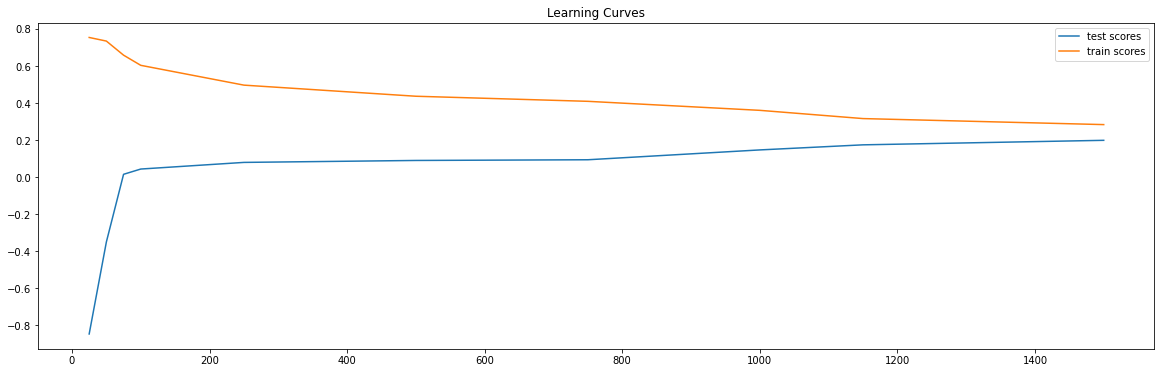

In [117]:
plot_learning(X_scaled,y)

In [29]:
from sklearn.inspection import permutation_importance
import numpy as np

lin_model = best_svc.fit(X_scaled,y)

perm = permutation_importance(lin_model, X_scaled, y, n_repeats=10)

perm_df = pd.DataFrame(np.vstack((X.columns, perm.importances_mean)).T, columns=['feature', 'importance']).sort_values('importance', ascending=False)
perm_df

from sklearn.model_selection import cross_val_score

col_keep = list(perm_df[perm_df['importance']>0.010]['feature'])
X_simplified = X[col_keep]
X_simplified = scaler.fit_transform(X_simplified)

simplified_model_score = cross_val_score(lin_model, X_simplified, y).mean()
simplified_model_score

0.17805228478709995

In [30]:
perm_df

,feature,importance
3,top-gc-riders,0.11816
4,top-sprinters,0.065315
1,team_points,0.036459
7,profile_score,0.036459
9,scorito,0.033623
5,top-time-trial-riders,0.031955
2,best-classic-riders,0.030797
8,profile_vert,0.015047
6,profile_type,0.012929
10,strength,0.011859
